In [1]:
import numpy as np
# import tensorflow as tf
import librosa
import note_seq
import bokeh


import matplotlib.pyplot as plt

/home/ilya20/documents/MusicTranscription/.venv/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
from src.features.build_features import tokenize, detokenize, make_spectrogram, split_spectrogram

In [3]:
test_tokenize = note_seq.midi_file_to_note_sequence("../data/raw/tokenize_test.MID")

test_tokenize.notes[0].end_time = 0.3
note_seq.plot_sequence(test_tokenize)

times = [0, 0.2, 0.4, 0.6, 0.8]
notes = tokenize(test_tokenize, times, 0.2)

detokenized = detokenize(notes, times, 0.2)
note_seq.plot_sequence(detokenized)

Loading BokehJS ...

Loading BokehJS ...

In [4]:
test_tokenize = note_seq.midi_file_to_note_sequence("../data/raw/tokenize_test_2.MID")

note_seq.plot_sequence(test_tokenize)

c = 20
part = 2 / c
times = [part * i for i in range(c)]
notes = tokenize(test_tokenize, times, part)

# notes[-8]

detokenized = detokenize(notes, times, part)
note_seq.plot_sequence(detokenized)

Loading BokehJS ...

Loading BokehJS ...

In [5]:
test_tokenize = note_seq.midi_file_to_note_sequence("../data/raw/tokenize_test_3.MID")

note_seq.plot_sequence(test_tokenize)

c = 20
part = 2 / c
times = [part * i for i in range(c)]
notes = tokenize(test_tokenize, times, part)

detokenized = detokenize(notes, times, part)
note_seq.plot_sequence(detokenized)

Loading BokehJS ...

Loading BokehJS ...

In [6]:
test_tokenize = note_seq.midi_file_to_note_sequence("../data/raw/tokenize_test_1.MID")

note_seq.plot_sequence(test_tokenize)

times = [0.25 * i for i in range(8)]
notes = tokenize(test_tokenize, times, 0.25)

detokenized = detokenize(notes, times, 0.25)
note_seq.plot_sequence(detokenized)

Loading BokehJS ...

Loading BokehJS ...

In [7]:
test_notes = note_seq.midi_file_to_note_sequence("../data/raw/test_midi.MID")

c = 100
part = 10 / c
times = [part * i for i in range(c)]
notes = tokenize(test_notes, times, part)

detokenized = detokenize(notes, times, part)

fig = note_seq.plot_sequence(test_notes, False)
fig_proc = note_seq.plot_sequence(detokenized, False)

fig.height = 200
fig_proc.height = 200
fig.width = 1000
fig_proc.width = 1000

bokeh.plotting.output_notebook()
bokeh.plotting.show(fig)
bokeh.plotting.show(fig_proc)

Loading BokehJS ...

In [8]:
test_notes = note_seq.midi_file_to_note_sequence("../data/raw/maestro-v3.0.0/2018/MIDI-Unprocessed_Chamber2_MID--AUDIO_09_R3_2018_wav--1.midi")

c = 20000
part = 600 / c
times = [part * i for i in range(c)]
notes = tokenize(test_notes, times, part)

# print(notes[])

detokenized = detokenize(notes, times, part)

fig = note_seq.plot_sequence(test_notes, False)
fig_proc = note_seq.plot_sequence(detokenized, False)

fig.height = 450
fig_proc.height = 450
fig.width = 1500
fig_proc.width = 1500

bokeh.plotting.output_notebook()
bokeh.plotting.show(fig)
bokeh.plotting.show(fig_proc)

Loading BokehJS ...

In [3]:
y, sr = librosa.load("../data/raw/maestro-v3.0.0/2018/MIDI-Unprocessed_Chamber2_MID--AUDIO_09_R3_2018_wav--1.wav", sr=44100)

In [4]:
y.size

25721783

In [5]:
from src.entities.audio_params import AudioParams
from src.entities.dataset_params import DatasetParams


audio_params = AudioParams(
    sample_rate=sr,
    frame_length=4096,
    n_mels=512,
    fmin=8,
    fmax=12500,
    window="hann"
)
hop_length = audio_params.frame_length // 8

spectrogram = make_spectrogram(y, audio_params, hop_length)

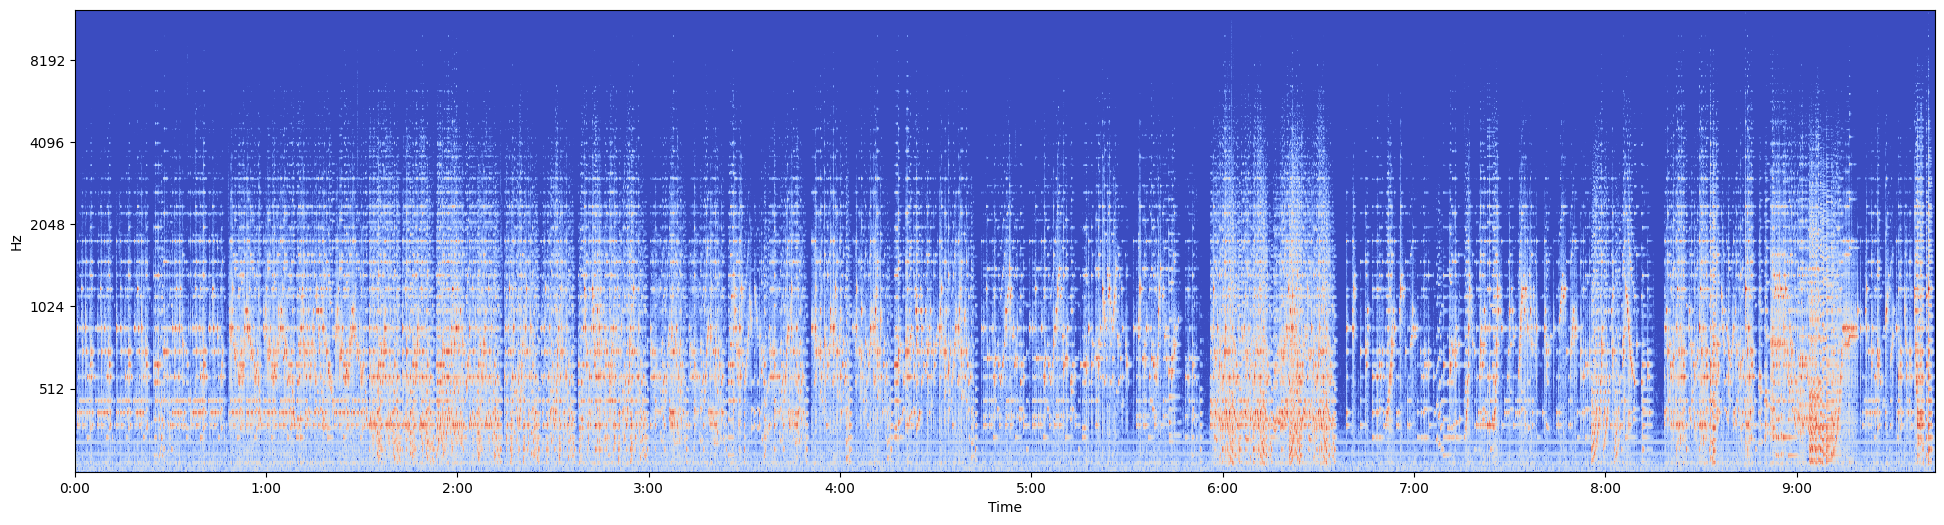

In [6]:
import librosa.display

plt.figure(figsize=(24, 6))
librosa.display.specshow(spectrogram, sr=sr, x_axis='time',y_axis='mel', fmax=12500, fmin=8, hop_length=hop_length)